# Jores et al 2021 Benchmarking 
**Authorship:**
Adam Klie, *09/12/2022*
***
**Description:**
Notebook to plot benchmarking results for all trained models on the Jores et al (2021) dataset.
***

In [1]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import os
import glob
import logging
import torch
import numpy as np
import pandas as pd
import eugene as eu
import matplotlib.pyplot as plt
import matplotlib

# For illustrator editing
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Global seed set to 13


GPU is available: True
Number of GPUs: 1
Current GPU: 0
GPUs: Quadro RTX 5000


In [2]:
eu.settings.dataset_dir = "/cellar/users/aklie/data/eugene/jores21"
eu.settings.output_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/jores21"
eu.settings.logging_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/logs/jores21"
eu.settings.config_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/configs/jores21"
eu.settings.figure_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/figures/jores21"

# Generate performance figures

## Leaf models

In [3]:
# Read in the predictions 
sdata_leaf = eu.dl.read_h5sd(os.path.join(eu.settings.output_dir, "leaf_test_predictions.h5sd"))

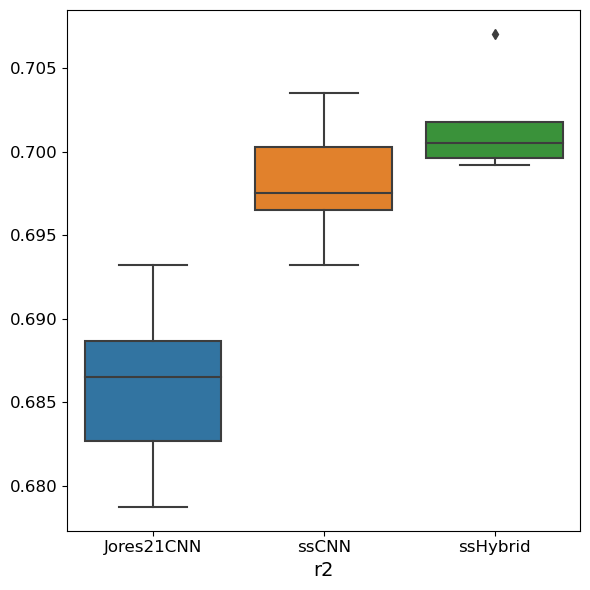

In [6]:
# Summarize performance across models for r2
model_scores = eu.pl.performance_summary(
    sdata_leaf,
    target="enrichment",
    prediction_groups=["Jores21CNN"]*5 + ["ssCNN"]*5 + ["ssHybrid"]*5,
    metrics=["r2"],
    add_swarm=False,
    figsize=(6, 6),
    save=os.path.join(eu.settings.figure_dir, "leaf_performance_boxplot.pdf")
)
#plt.savefig(os.path.join(eu.settings.figure_dir, "leaf_performance_boxplot.pdf"))

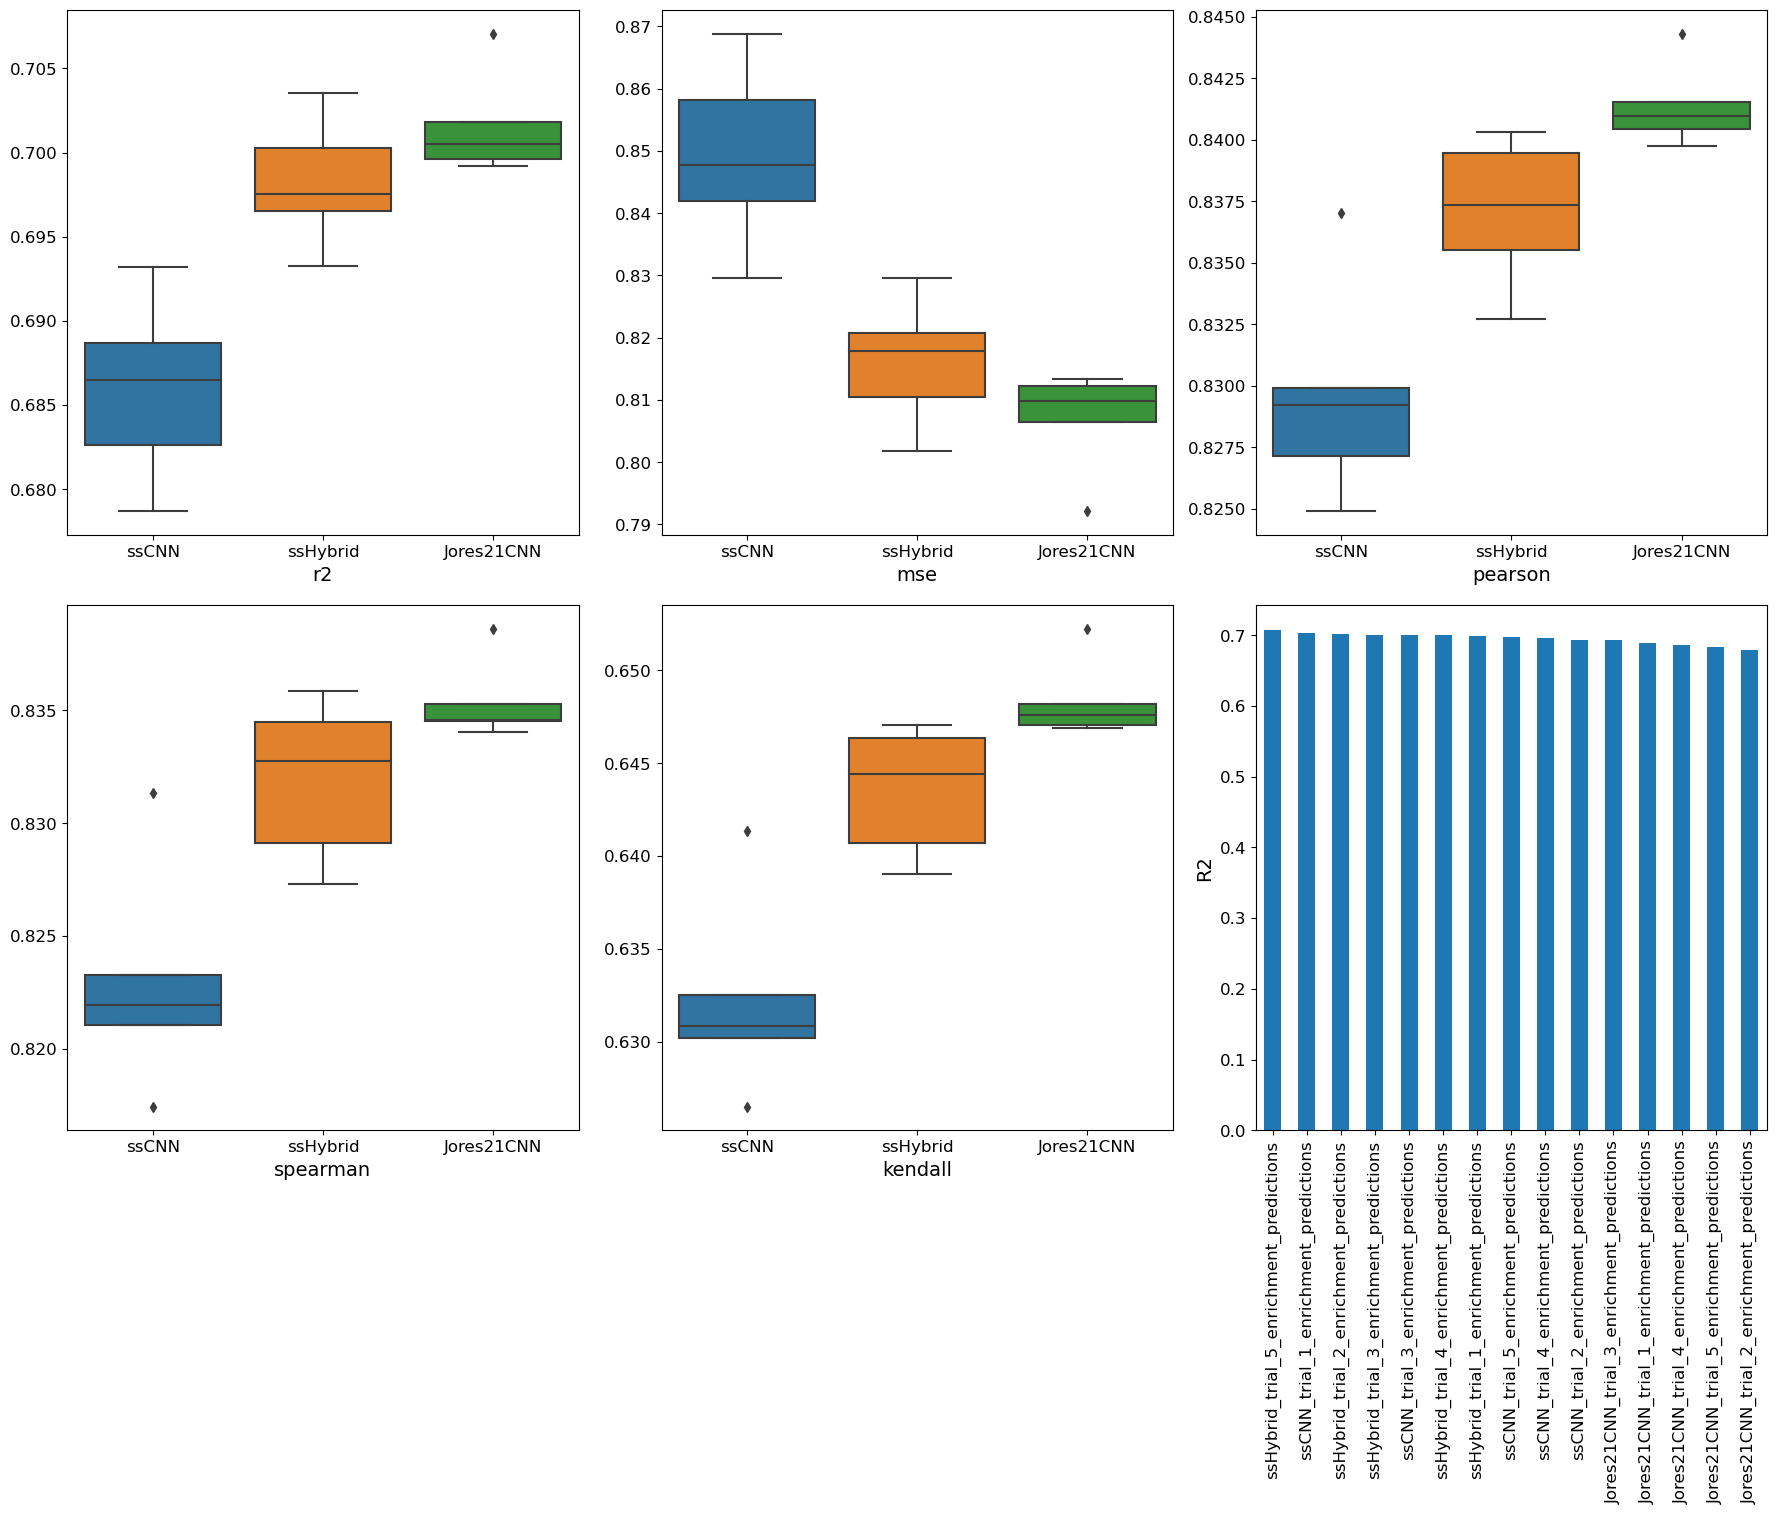

In [7]:
# Summarize performance across models for a metric
model_scores = eu.pl.performance_summary(
    sdata_leaf,
    target="enrichment",
    prediction_groups=["ssCNN"]*5 + ["ssHybrid"]*5 + ["Jores21CNN"]*5,
    metrics=["r2", "mse", "pearson", "spearman", "kendall"],
    add_swarm=False,
    figsize=(6, 6),
)

# Identify the best model from returned model scores
r2_sorted = model_scores["r2"].sort_values(ascending=False)
r2_sorted.plot(kind="bar", ylabel="R2")
plt.savefig(os.path.join(eu.settings.figure_dir, "leaf_performance_summary.pdf"))

Group R2 MSE Spearmanr
At 0.5164099190409797 0.6735613405589178 0.7046093358911515
Sb 0.66927878113486 0.8979140299942686 0.8363478785599603
Zm 0.7465031255417363 0.7718591023794221 0.8672154866420015


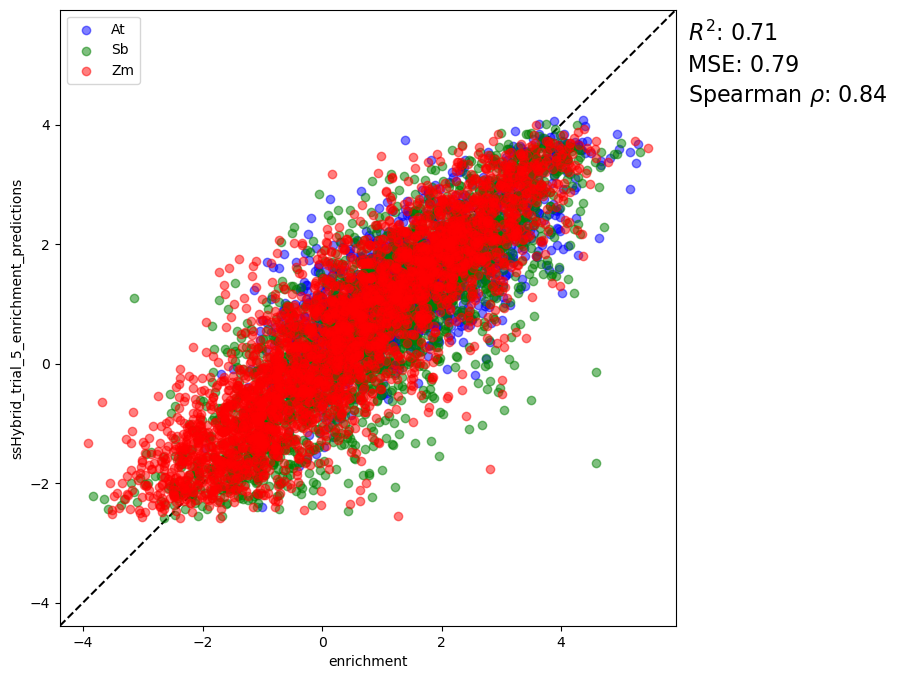

In [8]:
# Plot the performances across species for the best model
best_preds = r2_sorted.index[0]
ax = eu.pl.performance_scatter(
    sdata_leaf, 
    targets="enrichment", 
    predictions=best_preds,
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8),
    rasterized=True,
    save=os.path.join(eu.settings.figure_dir, "leaf_best_model_performance_scatter_by_sp.pdf")
)

## Proto models

In [9]:
# Read in if already made predictions and generated file above
sdata_proto = eu.dl.read_h5sd(os.path.join(eu.settings.output_dir, "proto_test_predictions.h5sd"))

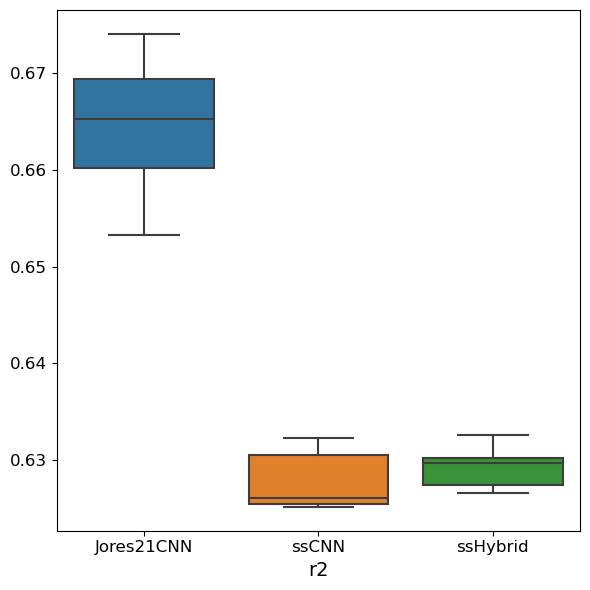

In [10]:
# Summarize performance across models for r2
model_scores = eu.pl.performance_summary(
    sdata_proto,
    target="enrichment",
    prediction_groups=["Jores21CNN"]*5 + ["ssCNN"]*5 + ["ssHybrid"]*5,
    metrics=["r2"],
    add_swarm=False,
    figsize=(6, 6),
    save=os.path.join(eu.settings.figure_dir, "proto_performance_boxplot.pdf")
)

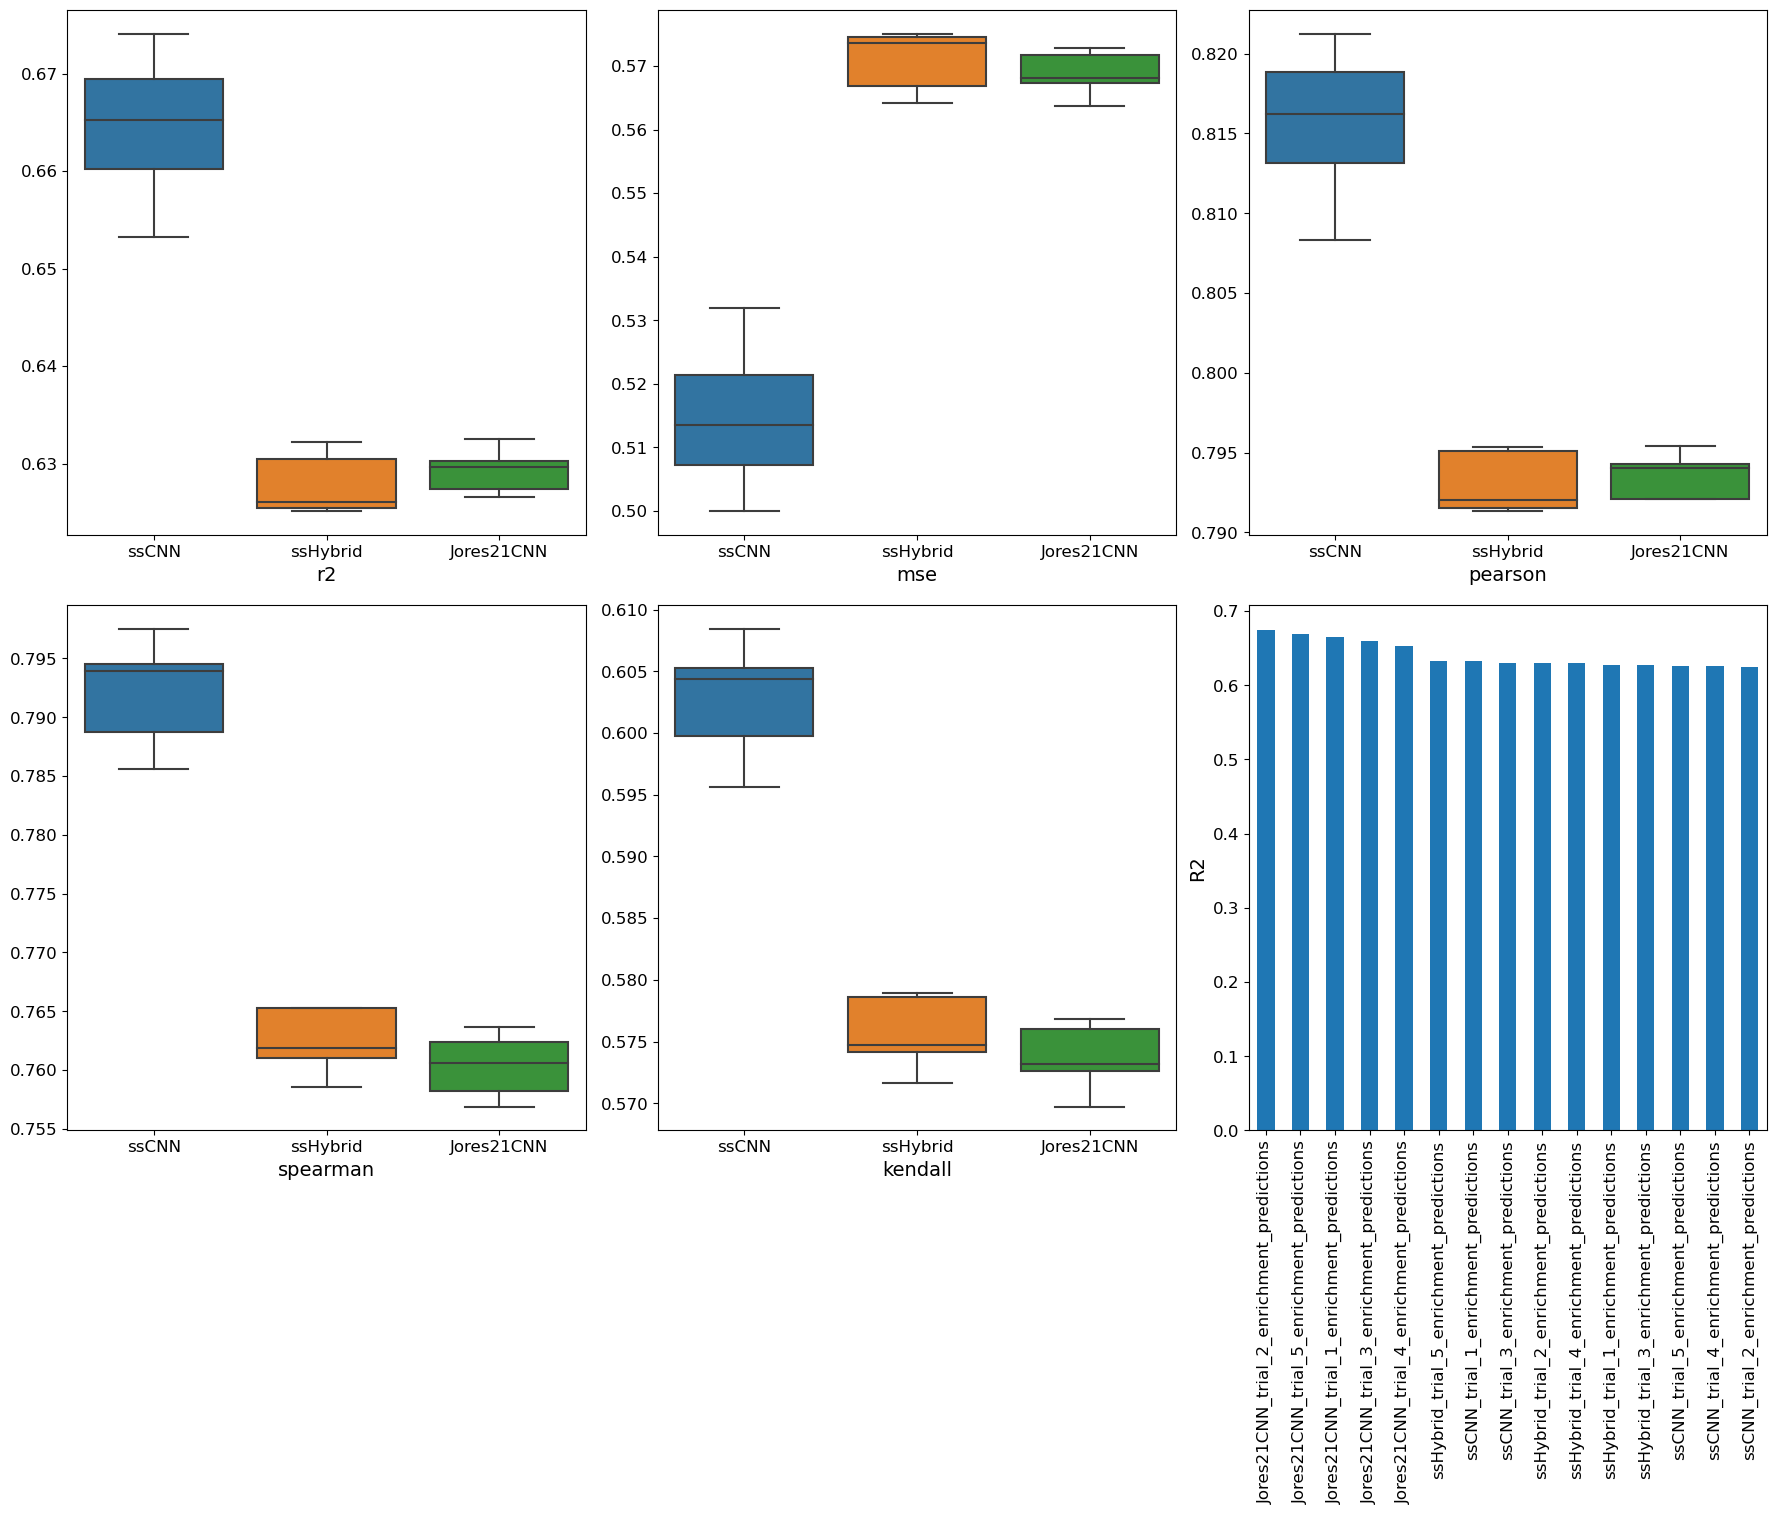

In [11]:
# Summarize performance across models for a metric
model_scores = eu.pl.performance_summary(
    sdata_proto,
    target="enrichment",
    prediction_groups=["ssCNN"]*5 + ["ssHybrid"]*5 + ["Jores21CNN"]*5,
    metrics=["r2", "mse", "pearson", "spearman", "kendall"],
    add_swarm=False,
    figsize=(6, 6),
)

# Identify the best model from returned model scores
r2_sorted = model_scores["r2"].sort_values(ascending=False)
r2_sorted.plot(kind="bar", ylabel="R2")
plt.savefig(os.path.join(eu.settings.figure_dir, "proto_performance_summary.pdf"))

Group R2 MSE Spearmanr
At 0.5440916816535264 0.658250790295601 0.7347890286212341
Sb 0.6156402892732311 0.48231022839226223 0.7589680336461498
Zm 0.6909419943346388 0.4323280374029402 0.8187821061507342


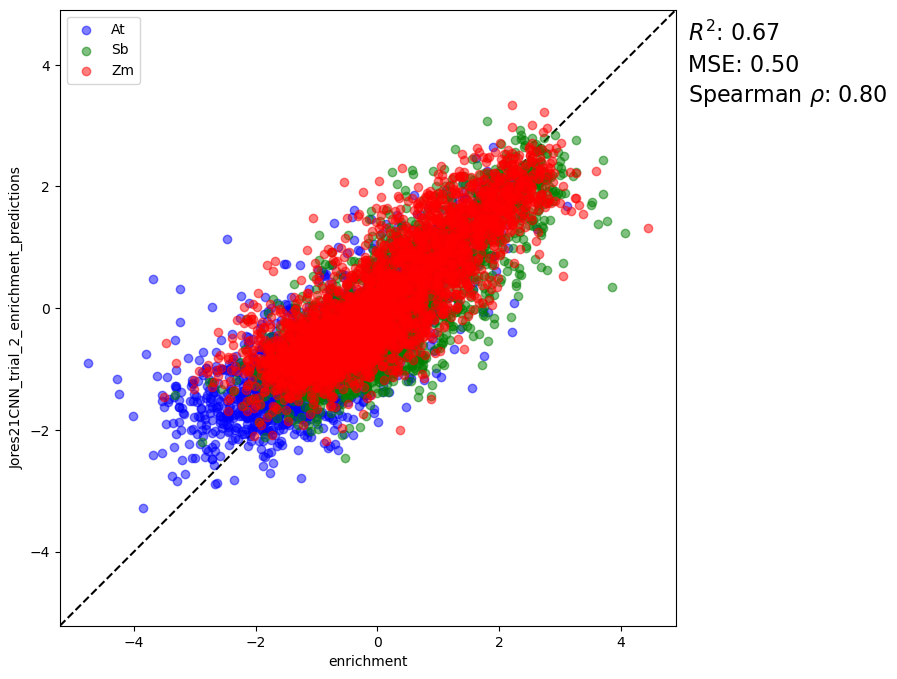

In [12]:
# Plot the performances across species for the best model
best_preds = r2_sorted.index[0]
ax = eu.pl.performance_scatter(
    sdata_proto, 
    targets="enrichment", 
    predictions=best_preds,
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8),
    rasterized=True,
    save=os.path.join(eu.settings.figure_dir, "proto_best_model_performance_scatter_by_sp.pdf")
)

## Combined models

In [ ]:
sdata_combined = eu.dl.read_h5sd(os.path.join(eu.settings.output_dir, "combined_test_predictions.h5sd"))

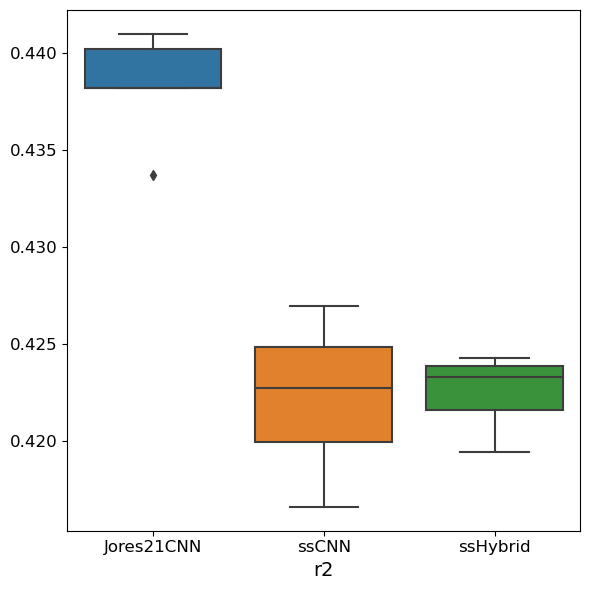

In [ ]:
# Summarize performance across models for a metric
model_scores = eu.pl.performance_summary(
    sdata_combined,
    target="enrichment",
    prediction_groups=["Jores21CNN"]*5 + ["ssCNN"]*5 + ["ssHybrid"]*5,
    metrics=["r2"],
    add_swarm=False,
    figsize=(6, 6),
)
plt.savefig(os.path.join(eu.settings.figure_dir, "combined_performance_boxplot.pdf"))

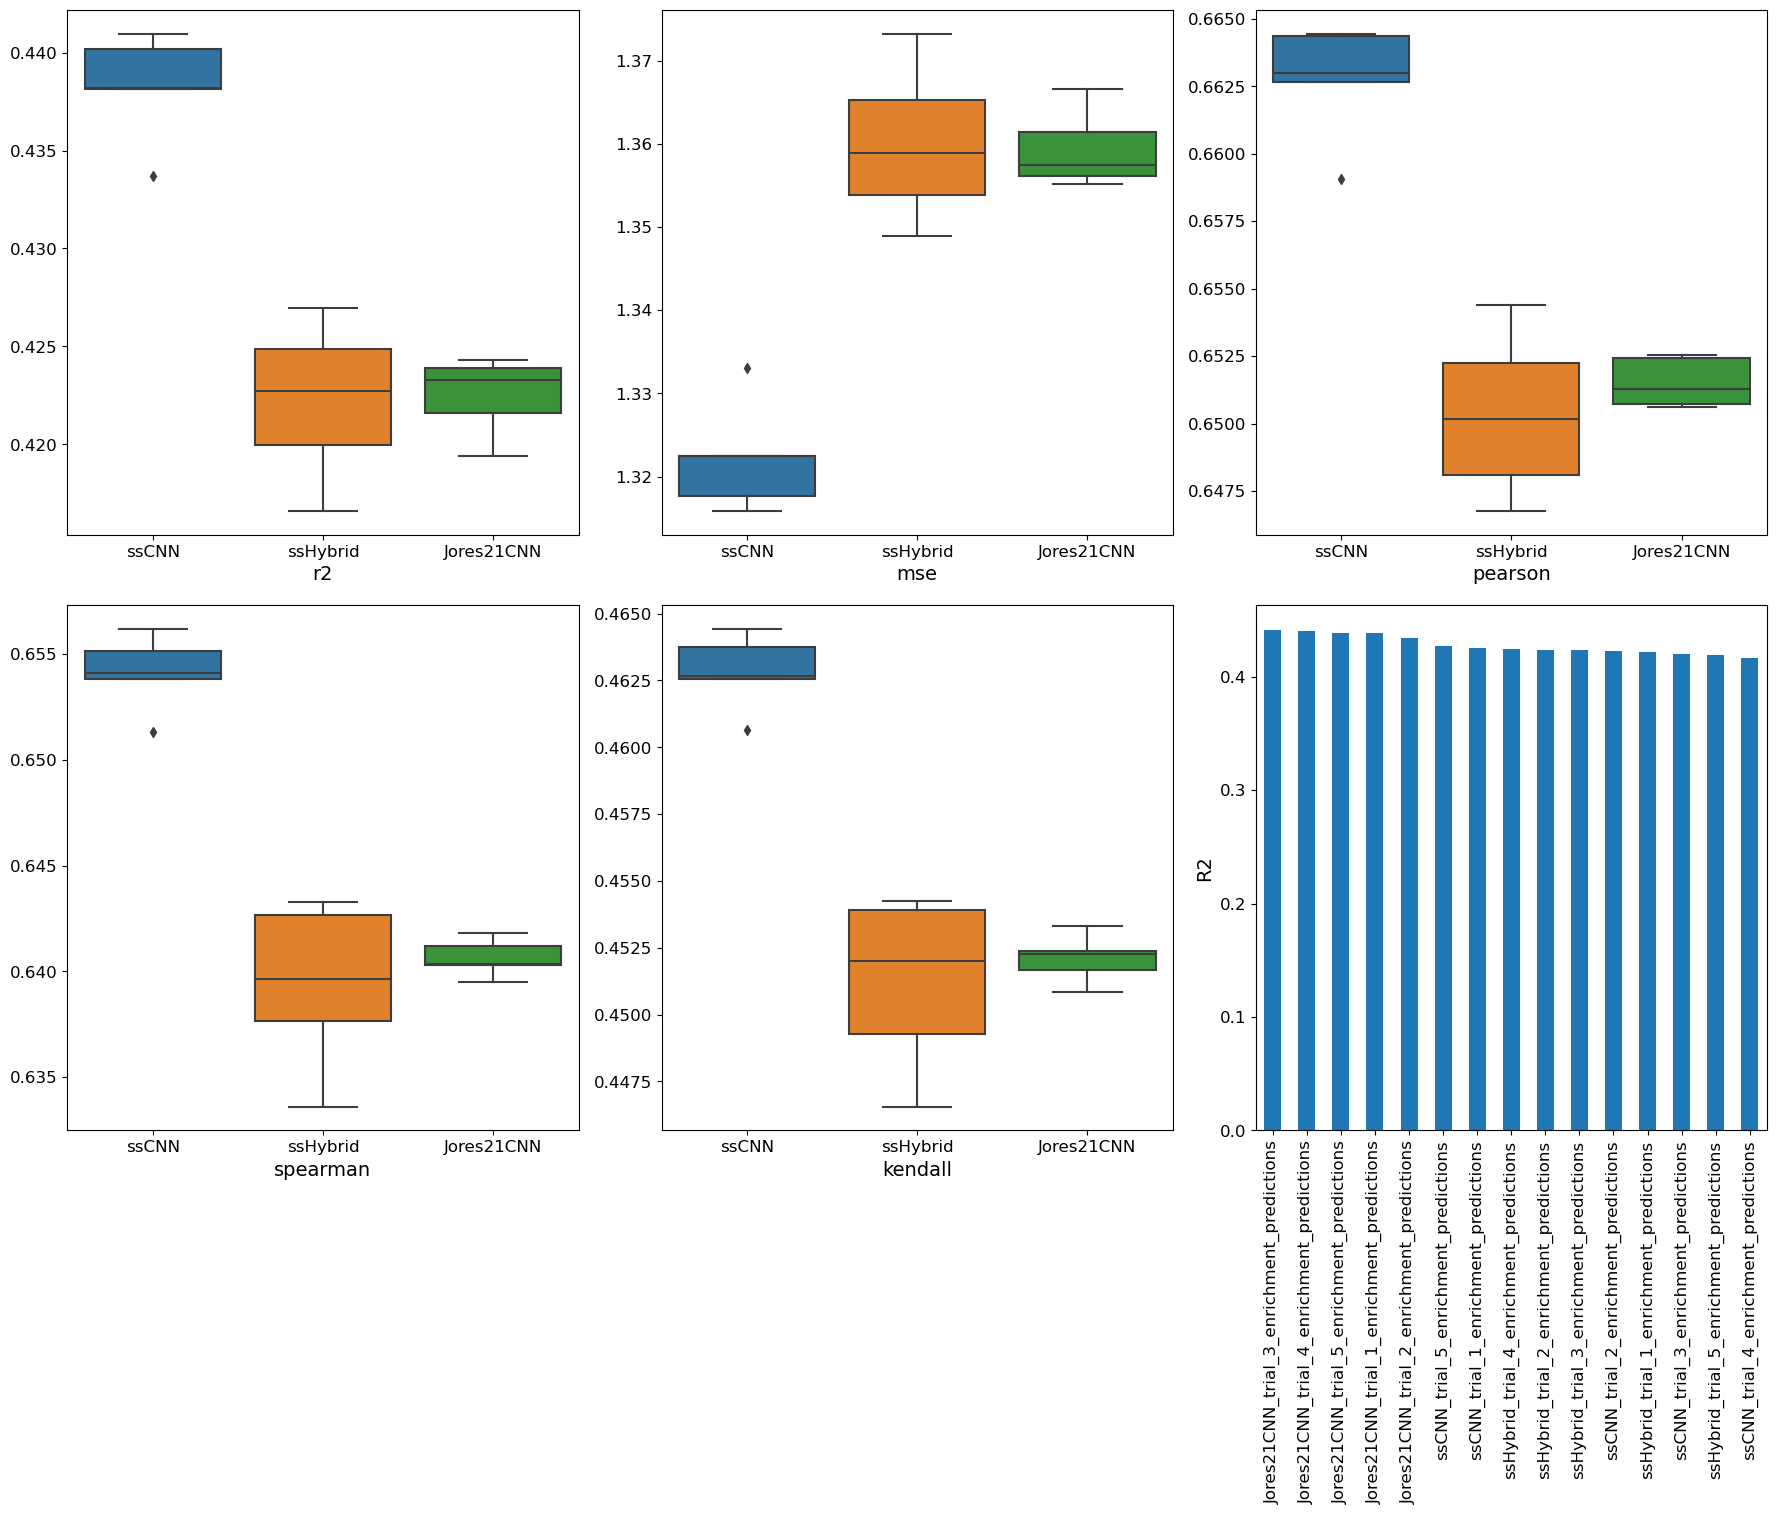

In [ ]:
# Summarize performance across models for a metric
model_scores = eu.pl.performance_summary(
    sdata_combined,
    target="enrichment",
    prediction_groups=["ssCNN"]*5 + ["ssHybrid"]*5 + ["Jores21CNN"]*5,
    metrics=["r2", "mse", "pearson", "spearman", "kendall"],
    add_swarm=False,
    figsize=(6, 6),
)

# Identify the best model from returned model scores
r2_sorted = model_scores["r2"].sort_values(ascending=False)
r2_sorted.plot(kind="bar", ylabel="R2")
plt.savefig(os.path.join(eu.settings.figure_dir, "combined_performance_summary.pdf"))

['enrichment'] ['Jores21CNN_trial_3_enrichment_predictions']
Group R2 MSE Spearmanr
At 0.2202550112535422 2.239013460097537 0.43521867369660105
Sb 0.4946961720778831 1.0660062311647631 0.7055883892700148
Zm 0.5425153156535154 1.0221359411025317 0.7383901215621534


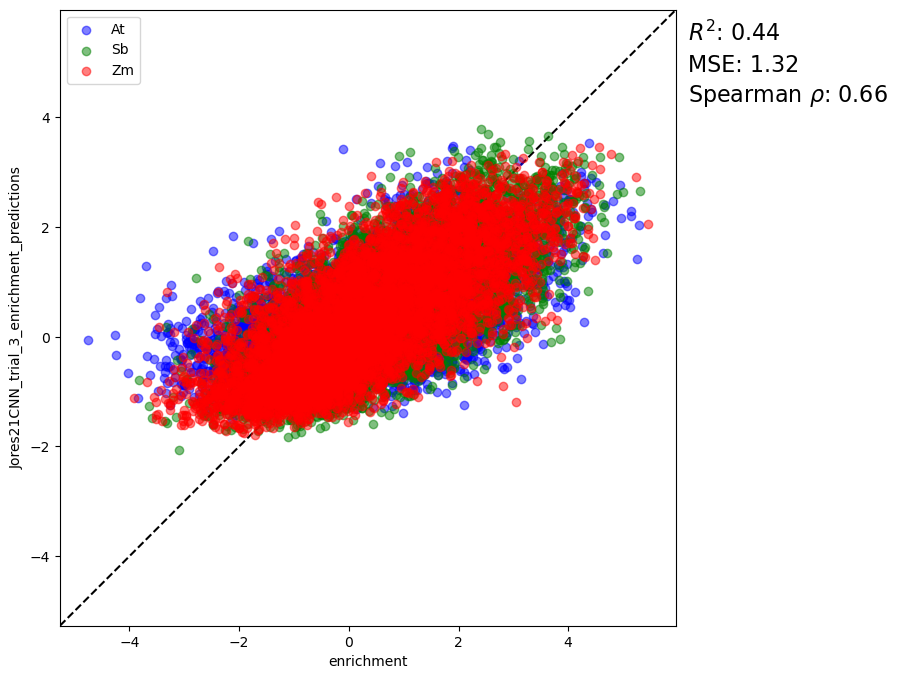

In [ ]:
# Plot the performances across species for the best model
best_preds = r2_sorted.index[0]
ax = eu.pl.performance_scatter(
    sdata_combined, 
    targets="enrichment", 
    predictions=best_preds,
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8),
    rasterized=True,
    save=os.path.join(eu.settings.figure_dir, "combined_best_model_performance_scatter_by_sp.pdf")
)

['enrichment'] ['Jores21CNN_trial_3_enrichment_predictions']
Group R2 MSE Spearmanr
At 0.2202550112535422 2.239013460097537 0.43521867369660105
Sb 0.4946961720778831 1.0660062311647631 0.7055883892700148
Zm 0.5425153156535154 1.0221359411025317 0.7383901215621534


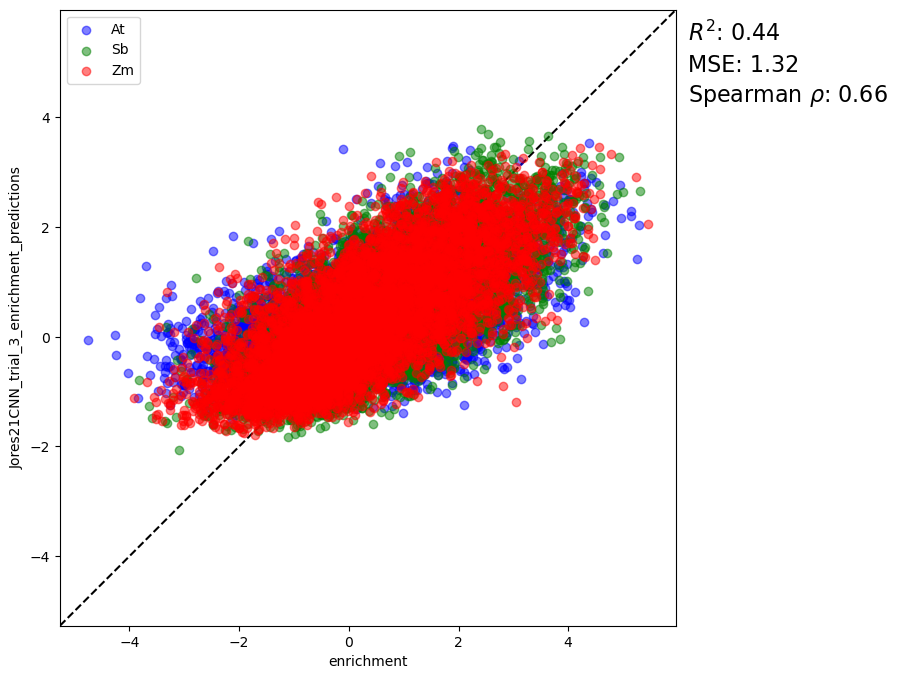

In [ ]:
# Plot the performances across species for the best model
best_preds = r2_sorted.index[0]
ax = eu.pl.performance_scatter(
    sdata_combined, 
    targets="enrichment", 
    predictions=best_preds,
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8),
    rasterized=True,
    save=os.path.join(eu.settings.figure_dir, "combined_best_model_performance_scatter_by_sp.pdf")
)